In [1]:
import scipy.stats
import numpy as np
import scipy as sp
import pandas as pd
import  matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
plt.rc("font", family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='DATE'>

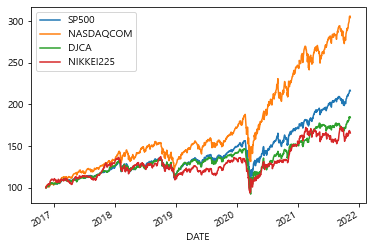

In [2]:
import pandas_datareader.data as web

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

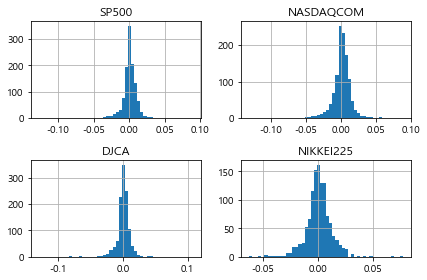

In [3]:
log_returns = np.log(data/data.shift(1))
log_returns.hist(bins=50)
plt.tight_layout()
plt.show()

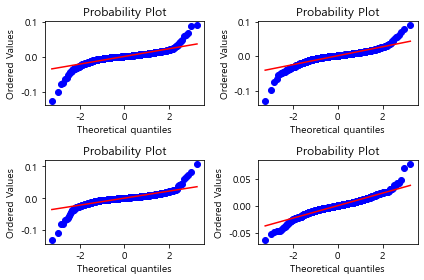

In [4]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

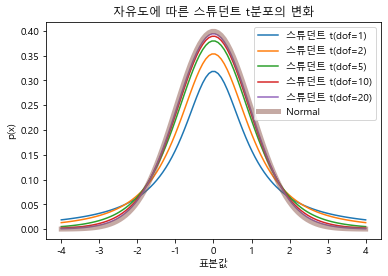

In [6]:
xx = np.linspace(-4, 4, 100)
for df in [1,2,5,10,20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=('스튜던트 t(dof=%d)' %df))
plt.plot(xx, sp.stats.norm().pdf(xx), label='Normal', lw=5, alpha=0.5)
plt.title('자유도에 따른 스튜던트 t분포의 변화')
plt.xlabel('표본값')
plt.ylabel('p(x)')
plt.legend()
plt.show()
# dof 값이 1일떄는 코시분포 > 커질수록 정규분포에 가까워짐

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


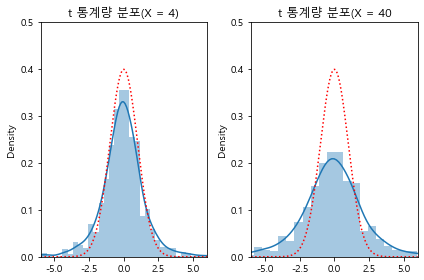

In [40]:
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1,2,1)
N = 4
x1 = rv.rvs((N,M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label='정규분포')
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title('t 통계량 분포(X = 4)')
plt.legend

plt.subplot(1,2,2)
N = 10
x2 = rv.rvs((N,M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label='정규분포')
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title('t 통계량 분포(X = 40')
plt.legend

plt.tight_layout()
plt.show()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

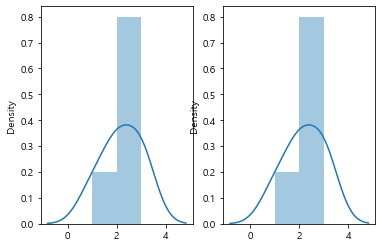

In [34]:
plt.subplot(121)
sns.distplot([1,2,3,3,2])
plt.subplot(122)
sns.distplot([1,2,3,3,2])